**Лабораторная работа №1. Логистическая регрессия в качестве нейронной сети**


Данные: В работе предлагается использовать набор данных notMNIST, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (A … J, соответственно). Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.
          	
Данные можно скачать по ссылке:
https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz (большой набор данных);
https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz (маленький набор данных);
Описание данных на английском языке доступно по ссылке:
http://yaroslavvb.blogspot.sg/2011/09/notmnist-dataset.html



In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc
import glob
import hashlib
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression

**Задание 1.** Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;

In [2]:
def plot(imagesDict):
    _, axis = plt.subplots(1, len(imagesDict))
    count = 0

    for key in imagesDict.keys():
        img = mpimg.imread(list(imagesDict[key])[0])
        axis[count].imshow(img)
        axis[count].axis("off")
        count += 1

    plt.show()
    

In [23]:
def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def removeDublicates(dataset):
    result = dict()
    for file in dataset:
        result[md5(file)] = file
    return list(result.values())

In [24]:
rootFolderName = "notMNIST_large/"
folders = glob.glob(rootFolderName + "*")

imagesDict = dict()
for folder in folders:
    images = glob.glob(folder + "/*.png")
    imagesSet = list()
    for image in images:
        imagesSet.append(image)
    imagesSet = removeDublicates(imagesSet)
    imagesDict[folder.replace(rootFolderName, "")] = imagesSet

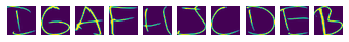

In [25]:
plot(imagesDict)

In [26]:
keys = imagesDict.keys()
print(keys)

dict_keys(['I', 'G', 'A', 'F', 'H', 'J', 'C', 'D', 'E', 'B'])


**Задание 2.**
Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).


In [27]:
for key in keys:
    print(key, len(imagesDict[key]))

I 41173
G 47090
A 47107
F 46844
H 46183
J 46658
C 46654
D 46734
E 46954
B 47283


**Задание 3.**
Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);


In [32]:
trainDict = dict()
validationDict = dict()
testDict = dict()

matches = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "I":8, "J":9}

for key in imagesDict.keys():
    imagesList = imagesDict[key]
    newKey = matches[key]
    trainDict[newKey] = imagesList[:20000]
    validationDict[newKey] = imagesList[20000:21000]
    testDict[newKey] = imagesList[21000:23000]

**Задание 4.**
Проверьте, что данные из обучающей выборки не пересекаются с данными из валидационной и контрольной выборок. Другими словами, избавьтесь от дубликатов в обучающей выборке.



In [33]:
for key in trainDict.keys():
    trainSet = set(trainDict[key])
    validationSet = set(validationDict[key])
    testSet = set(testDict[key])
    intersactionWithValidation = trainSet.intersection(validationSet)
    intersactionWithTest = trainSet.intersection(testSet)
    if len(intersactionWithValidation) > 0 or len(intersactionWithTest) > 0:
        print("Warning: sets intersaction")


**Задание 5.**
Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку SkLearn (http://scikit-learn.org).







In [113]:
def convertToLearnData(dataset):
    y = np.zeros(0)
    x = np.zeros(0)

    for key in tqdm(dataset):
        for path in dataset[key]:
            try:
                image = mpimg.imread(path)
            except:
                print(path)
            image = image.reshape(1, 784)
            if len(x) > 0 and len(y) > 0:
                x = np.append(x, image, axis=0)
                y = np.append(y, key)
            else:
                x = image
                y = np.array([key])
    return x, y

In [114]:
trainX, trainY = convertToLearnData(trainDict)
print("Train:", trainX.shape, trainY.shape)





  0%|          | 0/10 [00:00<?, ?it/s]



 10%|█         | 1/10 [06:06<54:57, 366.44s/it]



 20%|██        | 2/10 [26:14<1:22:32, 619.01s/it]



 30%|███       | 3/10 [51:41<1:43:59, 891.30s/it]



 40%|████      | 4/10 [1:25:02<2:02:25, 1224.32s/it]



 50%|█████     | 5/10 [2:07:08<2:14:33, 1614.73s/it]



 60%|██████    | 6/10 [2:59:14<2:17:52, 2068.22s/it]



 70%|███████   | 7/10 [4:00:48<2:07:47, 2555.94s/it]



 80%|████████  | 8/10 [5:14:36<1:43:54, 3117.40s/it]



 90%|█████████ | 9/10 [6:36:48<1:01:01, 3661.78s/it]



100%|██████████| 10/10 [8:04:41<00:00, 2908.14s/it] 

Train: (200000, 784) (200000,)


In [115]:
validationX, validationY = convertToLearnData(validationDict)
print("Validation:", validationX.shape, validationY.shape)






  0%|          | 0/10 [00:00<?, ?it/s]



 10%|█         | 1/10 [00:01<00:16,  1.78s/it]



 20%|██        | 2/10 [00:05<00:18,  2.35s/it]



 30%|███       | 3/10 [00:10<00:22,  3.23s/it]



 40%|████      | 4/10 [00:17<00:25,  4.26s/it]



 50%|█████     | 5/10 [00:25<00:27,  5.54s/it]



 60%|██████    | 6/10 [00:35<00:27,  6.88s/it]



 70%|███████   | 7/10 [00:47<00:24,  8.29s/it]



 80%|████████  | 8/10 [01:00<00:19,  9.74s/it]



 90%|█████████ | 9/10 [01:15<00:11, 11.27s/it]



100%|██████████| 10/10 [01:31<00:00,  9.19s/it]

Validation: (10000, 784) (10000,)


In [116]:
testX, testY = convertToLearnData(testDict)
print("Test:", testX.shape, testY.shape)





  0%|          | 0/10 [00:00<?, ?it/s]



 10%|█         | 1/10 [00:04<00:44,  4.97s/it]



 20%|██        | 2/10 [00:16<00:55,  6.89s/it]



 30%|███       | 3/10 [00:34<01:11, 10.25s/it]



 40%|████      | 4/10 [00:58<01:27, 14.54s/it]



 50%|█████     | 5/10 [01:30<01:37, 19.59s/it]



 60%|██████    | 6/10 [02:08<01:40, 25.08s/it]



 70%|███████   | 7/10 [02:52<01:32, 30.90s/it]



 80%|████████  | 8/10 [03:43<01:13, 36.87s/it]



 90%|█████████ | 9/10 [04:40<00:42, 42.90s/it]



100%|██████████| 10/10 [05:44<00:00, 34.41s/it]

Test: (20000, 784) (20000,)


In [134]:
trainSizes = [50, 100, 1000, 50000]

learnDictData = dict()

for size in trainSizes:
    newDict = dict()
    sliceSize = int(size / 10)
    for key in trainDict.keys():
        newDict[key] = trainDict[key][:sliceSize]
    newTrainX, newTrainY = convertToLearnData(newDict)
    clf = LogisticRegression(random_state=0).fit(newTrainX, newTrainY)
    score = clf.score(validationX, validationY)
    learnDictData[size] = score







100%|██████████| 10/10 [00:00<00:00, 142.36it/s][A
/Users/alinadolmatovich/anaconda2/envs/tensorflow-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)





100%|██████████| 10/10 [00:00<00:00, 263.46it/s][A
/Users/alinadolmatovich/anaconda2/envs/tensorflow-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit

In [135]:
clf = LogisticRegression(random_state=0).fit(trainX, trainY)
learnDictData[200000] = clf.score(validationX, validationY)

/Users/alinadolmatovich/anaconda2/envs/tensorflow-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [136]:
learnDictData

{50: 0.6416, 100: 0.7194, 1000: 0.7453, 50000: 0.8101, 200000: 0.8156}

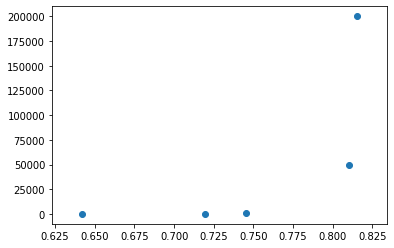

In [140]:
iterations = learnDictData.keys()
scores = learnDictData.values()

plt.scatter(scores, iterations)
plt.show()